In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap  # Import LinearSegmentedColormap

In [2]:
sc_data_fp = "D:/Desktop/Vittoria_project/subset_60percAUC_markers_list_roc_text.txt"

# Define the column names
column_names = ["cluster", "gene", "AUC", "log2FC", "prop_expr_in", "prop_expr_out", "res"]

# Step 2: Load the data using flexible whitespace handling because it's a mess
df = pd.read_csv(sc_data_fp, delim_whitespace=True, names=column_names, skiprows=1)

# Step 3: Convert numeric columns to the correct type
df["AUC"] = pd.to_numeric(df["AUC"])
df["log2FC"] = pd.to_numeric(df["log2FC"])
df["prop_expr_in"] = pd.to_numeric(df["prop_expr_in"])
df["prop_expr_out"] = pd.to_numeric(df["prop_expr_out"])

# Subset for only 1 resolution
df = df[df['res'] == 'RNA_snn_res.0.7']

# Sort by cluster and then log2FC
df = df.sort_values(by=['cluster', 'log2FC'], ascending=[True, False])

# Verify
df.head()

,cluster,gene,AUC,log2FC,prop_expr_in,prop_expr_out,res
54841,0,DNAH5,0.836462,2.529279,0.964625,0.466935,RNA_snn_res.0.7
54844,0,DNAH12,0.822045,2.386517,0.959708,0.424722,RNA_snn_res.0.7
54842,0,CDHR3,0.827258,2.340585,0.946527,0.402714,RNA_snn_res.0.7
54845,0,NEK10,0.819072,2.333848,0.950010,0.420294,RNA_snn_res.0.7
54846,0,RP1,0.815523,2.285437,0.942020,0.387334,RNA_snn_res.0.7


Create the same table as in Durante

In [3]:
# get top genes
num_genes_per_cluster = 5
min_AUC = 0.7

df_filtered = df[df['AUC'] > min_AUC]
df_top_genes = df_filtered.sort_values(by=['cluster', 'log2FC'], ascending=[True, False])

# Group by 'cluster' and take the top X rows for each cluster
df_top_genes = df_top_genes.groupby('cluster').head(num_genes_per_cluster)
df_top_genes.head()

,cluster,gene,AUC,log2FC,prop_expr_in,prop_expr_out,res
54841,0,DNAH5,0.836462,2.529279,0.964625,0.466935,RNA_snn_res.0.7
54844,0,DNAH12,0.822045,2.386517,0.959708,0.424722,RNA_snn_res.0.7
54842,0,CDHR3,0.827258,2.340585,0.946527,0.402714,RNA_snn_res.0.7
54845,0,NEK10,0.819072,2.333848,0.950010,0.420294,RNA_snn_res.0.7
54846,0,RP1,0.815523,2.285437,0.942020,0.387334,RNA_snn_res.0.7


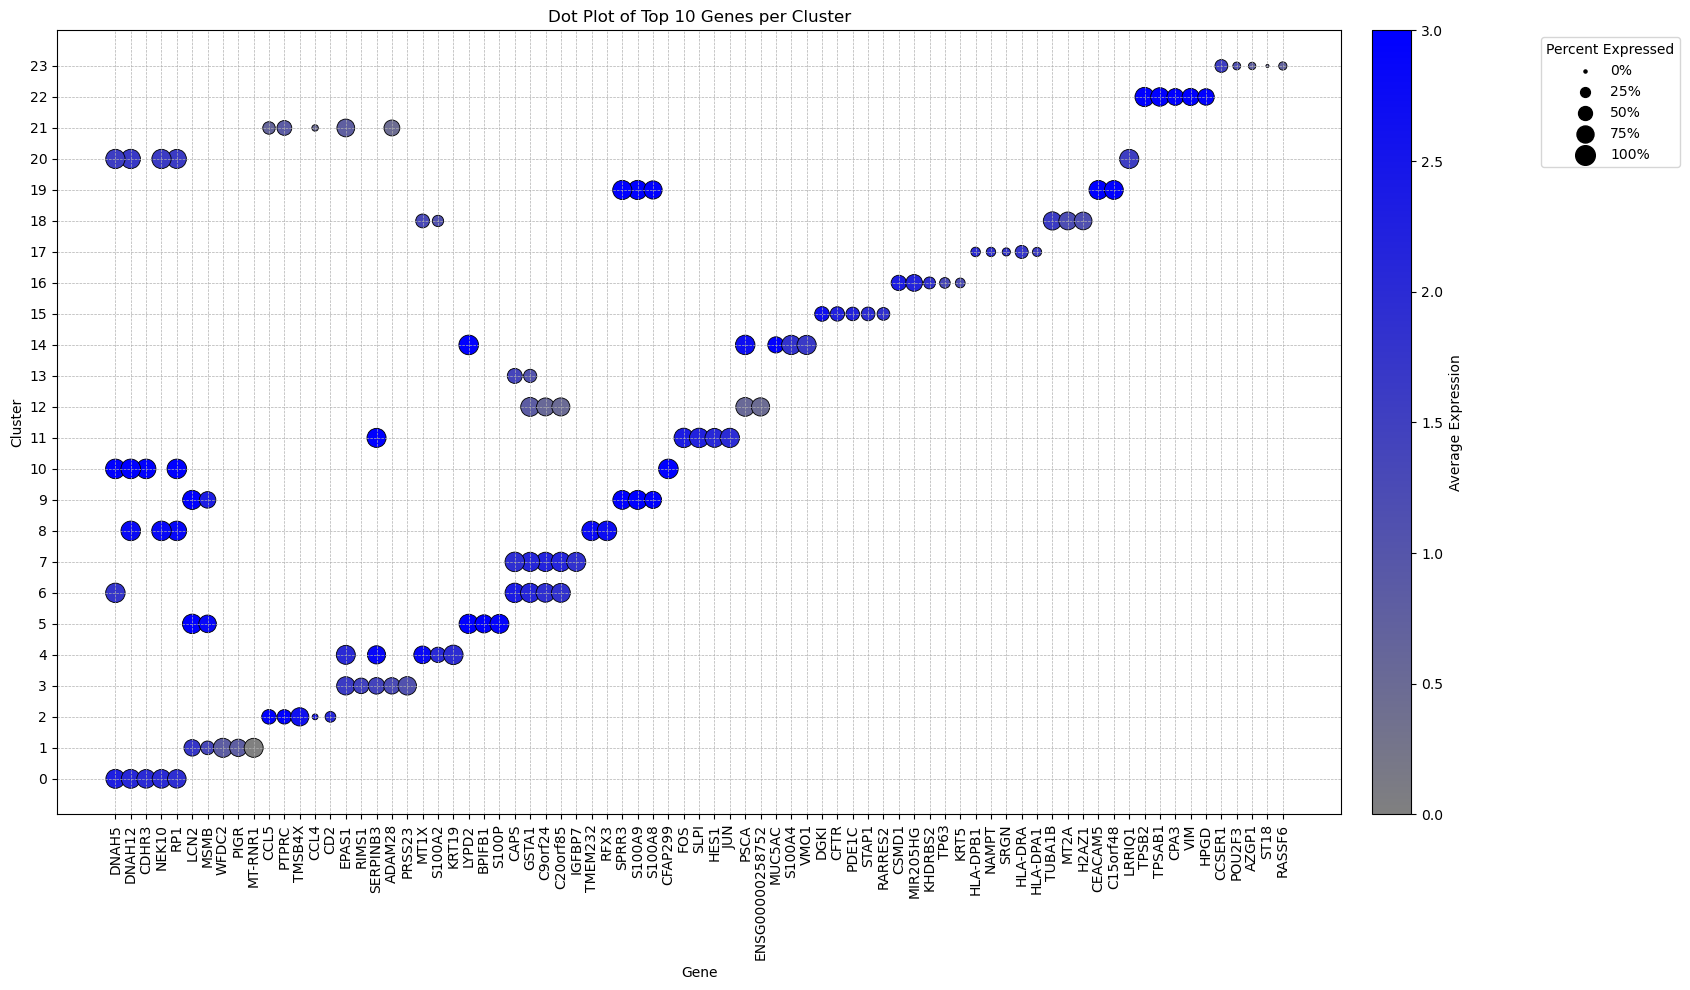

In [4]:
#Dynamically determine the max cluster value (max avg_log2FC capped at 3 for color)
max_cluster = df_top_genes['cluster'].max()
capped_avg_log2fc = df_top_genes['log2FC'].clip(upper=3)  # Cap color gradient at 3
cmap = LinearSegmentedColormap.from_list("custom_blue", ["grey", "blue"], N=256)

# Make plot
plt.figure(figsize=(20, 10))
scatter = sns.scatterplot(
    data=df_top_genes,
    x='gene', y='cluster', 
    size='prop_expr_in', sizes=(5, 200),  
    hue=capped_avg_log2fc, palette=cmap, edgecolor="black", legend=False  
)

#Create colorbar 
norm = plt.Normalize(vmin=0, vmax=3)  # Cap color scale at 3
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # This line makes sure the ScalarMappable is linked with colorbar
cbar = plt.colorbar(sm, label='Average Expression', ax=scatter.axes, pad=0.02)

#Manually create the size legend (Percent Expressed) 
for legend_size in [0, 25, 50, 75, 100]:  
    plt.scatter([], [], s=max(legend_size * 2, 5), color='black', label=f'{legend_size}%') 
plt.legend(title="Percent Expressed", bbox_to_anchor=(1.15, 1), loc='upper left')

# set the Y ticks based on the cluster range
plt.yticks(ticks=np.arange(0, max_cluster + 1, 1), labels=np.arange(0, max_cluster + 1, 1))

# Enable grid to align X-axis and Y-axis values
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5) 

plt.xticks(rotation=90)
plt.xlabel("Gene")
plt.ylabel("Cluster")
plt.title("Dot Plot of Top 10 Genes per Cluster")

# Step 13: Apply tight layout to prevent overlap
plt.tight_layout(rect=[0, 0, 0.85, 1])  
plt.show()

Label Cells using durante SI

In [5]:
# Load Durante Expanded Table
file_path = r'D:\Desktop\Vittoria_project\durante_expanded.xlsx'

durante_df = pd.read_excel(file_path, sheet_name='SI Table 3', header=1)

durante_df.head()

,gene,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster
0,KRT17,0,2.822114,0.961,0.256,0.0,Olfactory Horizontal Basal Cells
1,MEG3,0,2.118126,0.465,0.059,0.0,Olfactory Horizontal Basal Cells
2,KRT5,0,2.001055,0.986,0.165,0.0,Olfactory Horizontal Basal Cells
3,DST,0,1.982001,0.902,0.276,0.0,Olfactory Horizontal Basal Cells
4,KRT15,0,1.953341,0.487,0.107,0.0,Olfactory Horizontal Basal Cells


In [6]:
df.head()

,cluster,gene,AUC,log2FC,prop_expr_in,prop_expr_out,res
54841,0,DNAH5,0.836462,2.529279,0.964625,0.466935,RNA_snn_res.0.7
54844,0,DNAH12,0.822045,2.386517,0.959708,0.424722,RNA_snn_res.0.7
54842,0,CDHR3,0.827258,2.340585,0.946527,0.402714,RNA_snn_res.0.7
54845,0,NEK10,0.819072,2.333848,0.950010,0.420294,RNA_snn_res.0.7
54846,0,RP1,0.815523,2.285437,0.942020,0.387334,RNA_snn_res.0.7


In [7]:
def label_cluster_from_durante(cluster_df, durante_df):
    # Inputs: cluster df with rows cluster 	gene 	AUC 	log2FC 	prop_expr_in 	prop_expr_out 	res
    #         durante_df with rows gene p_val  avg_logFC  pct.1  pct.2  p_val_adj cluster
    # Outputs: cluster df with labels
    ############################################
    cluster_df = cluster_df.copy()
    
    if "cell_label" not in cluster_df.columns:
            cluster_df["cell_label"] = ""
            
    if "score" not in cluster_df.columns:
        cluster_df["score"] = 0.0
        
    # Group cluster_df by "cluster"
    for cluster_name, cluster_genes in cluster_df.groupby("cluster"):
        highest_label_score = 0
        best_cluster_label = ""

        # Iterate through each cluster in durante_df
        for durante_cluster, durante_genes in durante_df.groupby("cluster"):
            # Merge cluster_genes with durante_genes on "gene"
            merged_df = cluster_genes.merge(durante_genes, on="gene", how="inner")

            # Calculate label score as the sum of avg_logFC * log2FC for all matched genes
            label_score = (merged_df["avg_logFC"] * merged_df["log2FC"]).sum()

            # Update the highest score and best cluster label if applicable
            if label_score > highest_label_score:
                highest_label_score = label_score
                best_cluster_label = durante_cluster

        # Assign the best label and score to all rows in the current cluster
        cluster_df.loc[cluster_df["cluster"] == cluster_name, "cell_label"] = best_cluster_label
        cluster_df.loc[cluster_df["cluster"] == cluster_name, "score"] = highest_label_score

    return cluster_df

In [8]:
# Label cells in the original df, or use "df_top_genes"
labelled_df = label_cluster_from_durante(df, durante_df)

# Group by 'cluster' and get the first value of 'cell_label' and 'score' for each cluster
cluster_labels_scores = labelled_df.groupby("cluster")[["cell_label", "score"]].first()

# Sort the clusters by score in descending order
cluster_labels_scores = cluster_labels_scores.sort_values(by="score", ascending=False)

# Print the label and score for each cluster
print("Cluster Labels and Scores:")
for cluster, row in cluster_labels_scores.iterrows():
    print(f"Cluster {cluster}: Label = {row['cell_label']}, Score = {row['score']:.1f}")
    

Cluster Labels and Scores:
Cluster 6: Label = Respiratory Ciliated Cells, Score = 518.6
Cluster 7: Label = Respiratory Ciliated Cells, Score = 481.1
Cluster 10: Label = Respiratory Ciliated Cells, Score = 395.3
Cluster 8: Label = Respiratory Ciliated Cells, Score = 377.5
Cluster 0: Label = Respiratory Ciliated Cells, Score = 354.7
Cluster 20: Label = Respiratory Ciliated Cells, Score = 312.8
Cluster 12: Label = Respiratory Ciliated Cells, Score = 311.3
Cluster 22: Label = Mast Cells, Score = 211.8
Cluster 5: Label = Sustentacular Cells, Score = 187.2
Cluster 14: Label = Sustentacular Cells, Score = 182.9
Cluster 2: Label = T Cells, CD8+, Score = 145.7
Cluster 11: Label = Sustentacular Cells, Score = 138.5
Cluster 19: Label = Dendritic Cells, Score = 111.9
Cluster 4: Label = Respiratory Horizontal Basal Cells, Score = 111.0
Cluster 15: Label = Olfactory Microvillar Cells, Score = 102.9
Cluster 17: Label = Macrophages, Score = 92.2
Cluster 18: Label = Unspecified, Score = 79.6
Cluster 9:

In [ ]:
## Data from Durante et al methods
nasal_marker_genes = {
    'CD8+ T Cells': ['CD3D', 'CD3E', 'CD8A'],
    'CD4+ T Cells': ['CD3D', 'CD3E', 'CD4', 'IL7R'],
    'Natural Killer Cells': ['FGFBP2', 'FCGR3A', 'CX3CR1'],
    'B Cells': ['CD19', 'CD79A', 'MS4A4A'],
    'Plasma Cells': ['MZB1', 'SDC1', 'CD79A'],
    'Monocytes': ['CD14', 'S100A12', 'CLEC10A'],
    'Macrophages': ['C1QA', 'C1QB', 'C1QC'],
    'Dendritic Cells': ['CD1C'],  # Lack of C1QA, C1QB, and C1QC
    'Mast Cells': ['TPSB2', 'TPSAB1'],
    'Fibroblasts/Stromal Cells': ['LUM', 'DCN', 'CLEC11A'],
    'Respiratory Ciliated Cells': ['FOXJ1', 'CFAP126', 'STOML3'],
    'Respiratory HBCs': ['KRT5', 'TP63', 'SOX2'],
    'Respiratory Gland Progenitor Cells': ['SOX9', 'SCGB1A1'],
    'Respiratory Secretory Cells': ['MUC5', 'CYP4B1', 'TFF3'],
    'Vascular Smooth Muscle Cells': ['TAGLN', 'MYH11'],
    'Pericytes': ['SOX17', 'ENG'],
    'Bowmans Glands': ['SOX9', 'SOX10', 'MUC5', 'GPX3'],
    'Olfactory HBCs': ['TP63', 'KRT5', 'CXCL14', 'SOX2', 'MEG3'],
    'Olfactory Ensheathing Glia': ['S100B', 'PLP1', 'PMP2', 'MPZ', 'ALX3'],
    'Olfactory Microvillar Cells': ['ASCL3', 'CFTR', 'HEPACAM2', 'FOXL1'],
    'Immature Neurons': ['GNG8', 'OLIG2', 'EBF2', 'LHX2', 'CBX8'],
    'Mature Neurons': ['GNG13', 'EBF2', 'CBX8', 'RTP1'],
    'GBCs': ['HES6', 'ASCL1', 'CXCR4', 'SOX2', 'EZH2', 'NEUROD1', 'NEUROG1'],
    'Sustentacular Cells': ['CYP2A13', 'CYP2J2', 'GPX6', 'ERMN', 'SOX2']
}

## nasal marker genes from Durante et al Ex. Fig 1 a, b
nasal_marker_genes_fig1 = {
    'Monocytes': ['CCL3L1', 'CD74', 'HLA-DQA1', 'HLA-DQB1', 'HLA-DRB1','HLA-DPA1', 'HLA-DPB1', 'HLA-DRA'],
    'GBCs': ['HES6', 'SOX11', 'ELAVL4', 'TUBB2B', 'SOX4', 'NEUROD1', 'NEUROG1', 'KLHL35'],
    'Olfactory Microvillar Cells': ['C15orf48', 'LRMP', 'BMX', 'SCNN1B', 'IGF1', 'RGS13', 'GNGT1', 'RGS13', 'CFTR', 'HEPACAM2', 'ASCL3'],
    'Mast Cells': ['RGS13', 'HPGD', 'CD69', 'HPGDS', 'CTSG', 'MS4A2', 'CPA3', 'TPSAB1', 'TPSB2'],
    'Respiratory Epithelial Cells': ['BPIFB1', 'PIP', 'DMBT1', 'SCGB1A1'],
    'Unspecified': [],
    'Mature Neurons': ['C1orf194', 'PPA1', 'PLEKHB1', 'UCHL1', 'NSG1', 'PCSK1N', 'TPPP3', 'GNG13', 'FSTL5', 'MAP1B', 'CALB2', 'CAPS', 'PLPP5', 'TOM1', 'CHGA','PPP1RA1'],
    'Olfactory Ensheathing Glia': ['CLU', 'APOC1', 'GPM6B', 'MIA', 'GRYAB', 'PLP1', 'APOE', 'S100B'],
    'B Cells': ['CD79A', 'CD37', 'MSA41', 'CD52', 'LTB'],
    'Immature Neurons': ['GNG8', 'SOX11', 'ELAVL4', 'UCHL1', 'PCSK1N',  'TUBA1A', 'GAP43', 'FSTL5', 'TUBB2B', 'MAP1B', 'CALB2', 'STMN2', 'STMN1', 'GDE1', 'STMN1', 'OLIG2', 'DCX', 'GNG8', 'EBF2', 'EMX2', 'SPOCK2', 'NHLH2'],
    'Natural Killer Cells': ['MYOM2', 'CST7', 'FGFBP2', 'KLRD1', 'PRF1', 'GZMB', 'NKG7', 'GNLY', 'KLRB1', 'CCL4', 'CCL5'],
    'Dendritic Cells': ['AIF1', 'CTSS', 'LST1', 'TYROBP', 'FCN1', 'IL1B', 'S100A9', 'S100A8'],
    'Respiratory Ciliated Cells': ['MORN2', 'GSTA1', 'TUBB4B', 'C1orf194', 'RSPH1', 'PIFO', 'AL357093.2', 'TMEM190', 'GSTA2', 'C20orf85', 'C9orf24', 'CAPS'],
    'Respiratory Columnar Cells': ['SERPINB3', 'PERP', 'TACSTD2', 'ALDH3A1', 'NTS', 'KRT19', 'AQP3', 'SFN'],
    'Bowmans Glands': ['BPIFB1', 'PIP', 'LCN15', 'BPIFB4', 'TCN1', 'LTF', 'FDCSP', 'ZG16B', 'LYZ', 'PRB3', 'DMBT1', 'BPIFA1', 'C6orf58', 'STATH', 'NCOA7'],
    'Macrophages' : ['CCL3L1', 'AIF1', 'TYROBP', 'RGS1', 'CD74', 'HLA-DQA1', 'HLA-DQB1', 'HLA-DRB1','HLA-DPA1', 'HLA-DPB1', 'HLA-DRA', 'GPR183'],
    'Plasma Cells': ['IGLC3', 'IGHG4', 'IGHG1', 'IGHG3', 'IGHA1', 'JCHAIN', 'IGKC', 'IGLC2'],
    'Respiratory Secretory Cells': ['NCOA7', 'NR4A1', 'DMBT1', 'DPIFA1', 'C6orf58', 'STATH'],
    'Vascular Smooth Muscle Cells': ['RGS16', 'RGS5', 'TPM2', 'ACTA2', 'C11orf96', 'MYL9', 'TAGLN', 'MYH11'],
    'Sustentacular Cells': ['SERPINB3', 'SCGB1A1', 'CYP2A13', 'S100P', 'WFDC2', 'TFF3', 'MUC5AC', 'LYPD2', 'MSMB', 'CYP2J2', 'ADAM28'],
    'Pericytes': ['EMCN', 'ITM2A', 'CLDN5', 'RAMP2', 'SPARCL1', 'GNG11', 'SELE', 'ACKR1'],
    'CD4+ T Cells': ['TRBC2', 'CD52', 'IL7R', 'LTB', 'CD3D', 'CD2', 'TRAC'],
    'CD8+ T Cells': ['TRBC2', 'CD52', 'IL7R', 'CD3D', 'CD2', 'TRAC', 'CCL4L', 'CXCR4', 'KLRB1', 'CCL4', 'CCL5'],
    'Fibroblasts/Stromal Cells': ['SFRP2', 'SFRP1', 'MGP', 'IGFBP6', 'FBLN1', 'APOD', 'DCN', 'LUM'],
    'Respiratory HBCs': ['PERP', 'TACSTD2', 'ALDH3A1', 'NTS', 'KRT19', 'AQP3', 'SFN', 'S100A2', 'KRT5'],
    'Olfactory HBCs': ['IGFBP5', 'CTSV', 'S100A2', 'KRT15', 'DST', 'KRT5', 'MEG3', 'KRT17', 'CEBPD', 'GADD45A', 'SULT1E1', 'LIMA1', 'JUN']
}



final_data = {
    "Cell Type": [
        "Olfactory Neurons (ON)", 
        "Globose Basal Cells (GBC)", 
        "Mature Olfactory Receptor Neurons (ORNs)", 
        "Immature ORNs", 
        "Microvillous Cells", 
        "Support Cells", 
        "Solitary Chemosensory Cells",
        "Respiratory Epithelium Cells"
    ],
    "Marker(s)": [
        "OMP, TrkB, NeuroD, β-tubulin, PGP9.5",  
        "N-CAM, GAP43, β-tubulin",  
        "OMP, TrkB",  
        "NeuroD, β-tubulin",  
        "TRPM5, Ca2+-activated cation current, PLCβ2, α-gustducin",  
        "PCK, β-tubulin",  
        "TRPM5, α-gustducin, PLCβ2",  
        "MUC5AC, MUC5B, PGP 9.5, β-tubulin"
    ],
    "Paper Referenced From": [
        "Olfactory neuron-specific expression of NeuroD in mouse and human nasal mucosa (Nibu et al., 1999)",
        "Olfactory neuron-specific expression of NeuroD in mouse and human nasal mucosa (Nibu et al., 1999)",
        "Olfactory neuron-specific expression of NeuroD in mouse and human nasal mucosa (Nibu et al., 1999)",
        "Olfactory neuron-specific expression of NeuroD in mouse and human nasal mucosa (Nibu et al., 1999)",
        "TRPM5-expressing microvillous cells in mouse olfactory epithelium (BMC Neuroscience, 2008)",
        "Neurodegeneration-Associated Proteins in Human Olfactory Neurons (Frontiers in Neuroscience, 2020)",
        "Microvillous and Solitary Chemosensory Cells in the Respiratory Epithelium (BMC Neuroscience, 2008)",
        "Nasal Mucosal Culture System for Human Respiratory Epithelium (Frontiers in Microbiology, 2019)"
    ]
}

# Create a final DataFrame for this compiled information
final_df = pd.DataFrame(final_data)

def merge_dicts(dict1, dict2):
    merged_dict = dict1.copy()  
    for key, value in dict2.items():
        if key in merged_dict:
            # If key exists in both, merge and remove duplicates
            merged_dict[key] = list(set(merged_dict[key] + value))
        else:
            merged_dict[key] = value
    return merged_dict

merged_nasal_marker_genes = merge_dicts(nasal_marker_genes, nasal_marker_genes_fig1)
merged_nasal_marker_genes

In [ ]:
merged_nasal_marker_genes

In [ ]:
## Add a cell type column and annotate cluster
# For each cluster in df_top_genes, check if there are any matches
for cluster in df_top_genes["cluster"]:
    top_genes = df_top_genes["cluster"] == cluster

In [ ]:
df_top_genes["gene"]

In [ ]:
# Function to get the top genes for a given cluster
def get_top_genes_per_cluster(df, cluster, top_n=5):
    # Filter the dataframe for the given cluster and take the top n genes based on log2FC
    cluster_df = df[df['cluster'] == cluster]
    top_genes_df = cluster_df.nlargest(top_n, 'log2FC')
    return top_genes_df

# Function to annotate the most likely cell type for a given cluster
def annotate_cluster_most_likely(df, cluster, merged_nasal_marker_genes, top_n=5):
    top_genes_df = get_top_genes_per_cluster(df, cluster, top_n)
    top_genes = top_genes_df['gene'].tolist()
    cell_type_matches = {}
    for cell_type, markers in merged_nasal_marker_genes.items():
        matching_markers = len([gene for gene in markers if gene in top_genes])
        if matching_markers > 0:
            cell_type_matches[cell_type] = matching_markers
    # Find the cell type with the most matching marker genes
    if cell_type_matches:
        most_likely_cell_type = max(cell_type_matches, key=cell_type_matches.get)
    else:
        most_likely_cell_type = 'Unknown'
    return most_likely_cell_type

# Function to annotate all clusters in the dataframe
def annotate_all_clusters(df, merged_nasal_marker_genes, top_n=5):
    unique_clusters = df['cluster'].unique()
    df['annotation'] = df['cluster'].apply(lambda cluster: annotate_cluster_most_likely(df, cluster, merged_nasal_marker_genes, top_n))
    return df

# Example usage:
df_with_annotations = annotate_all_clusters(df, merged_nasal_marker_genes, top_n=5)




In [ ]:
# print a list of clusters and their annotations
def print_cluster_annotations(df):
    cluster_annotations = df[['cluster', 'annotation']].drop_duplicates()
    for _, row in cluster_annotations.iterrows():
        print(f"Cluster {row['cluster']}: {row['annotation']}")

print_cluster_annotations(df_with_annotations)

In [ ]:
## Stuff from other papers:


In [ ]:
# Analysis by cluster: 

##Resources for automated annotation:
#PanglaoDB: https://panglaodb.se/search.html
#Cellmarker 2.0: http://bio-bigdata.hrbmu.edu.cn/CellMarker/CellMarker_annotation.jsp

In [ ]:
## Cluster 0
top = get_top_genes_per_cluster(df = df, cluster = 0)
gene_list = []
for gene in top['gene']:
    gene_list.append(gene)
    print(gene + ",")
print(', '.join(gene_list))
# from Panglaodb: "Basal Cells"
# From Cellmarker 2.0: "Malignant Cell"
# From Vittoria: HBSc
# From Durante: Cluster 0: Olfactory HBCs' 
# Sav: horizontal basal cells (HBCs)

# Chat GPT Prompt: Explain what each of these cell markers does in single cell seq
"""
KRT5 (Keratin 5):marker for basal epithelial cells, 
S100A2 (S100 Calcium Binding Protein A2): Tassociated with epithelial cells
TNC (Tenascin-C):extracellular matrix remodelin
PCP4L1 (Purkinje Cell Protein 4 Like 1): Synaptic plasticity
KRT17 (Keratin 17): Like KRT5
MT1X (Metallothionein 1X): metal ion homeostasis and protection from oxidative stress
SERPINB4 (Serpin Family B Member 4): epithelial cells, inflammation and immune response.
KHDRBS2 (KH RNA Binding Domain Containing Signal Transduction Associated 2): progenitor cells, differentiation.
TP63 (Tumor Protein p63):progenitor basal cells. maintenance and renewal of epithelial stem cells,
CSRP2 (Cysteine and Glycine Rich Protein 2):cytoskeletal regulation and cell differentiation
"""


In [ ]:
## Cluster 1
top = get_top_genes_per_cluster(df = df, cluster = 1)
gene_list = []
for gene in top['gene']:
    gene_list.append(gene)
    print(gene + ",")
print(', '.join(gene_list))
# from Pangaodb: "Basal Cells, Epithelial Cells"
# Vittoria: Sustentacular cells
# Cellmarker: Unknown
# Durante: Sustentacular Cells
# Sav: Respiratory Secretory cells
"""
MUC5AC goblet cells
GPRC5A, KRT4, and CYP2F1 respiratory epithelial cells
MSLN and TFPI2 secretory epithelial cells
MMP10 and ANPEP tissue remodeling and immune functions
"""

In [ ]:
## Cluster 2
top = get_top_genes_per_cluster(df = df, cluster = 2)
gene_list = []
for gene in top['gene']:
    gene_list.append(gene)
    print(gene + ",")
print(', '.join(gene_list))
# from Pangaodb: "T Cells"
# Cellmarker: "T Cells"
# Durante: CD8+ T cells
# Vittoria: Immune System
# Sav: T Cells
"""
TRBC2, CD3G, CD3D, and CD2 are essential markers of T cells.
CCL4, CCL5, and IL32 indicate immune cell recruitment, inflammation, and active immune response, typical of T cells in inflammatory environments.
HCST and CD52 further support the presence of immune cells, particularly T cells and NK cells.
"""



In [ ]:
top = get_top_genes_per_cluster(df = df, cluster = 3)
gene_list = []
for gene in top['gene']:
    gene_list.append(gene)
    print(gene + ",")
print(', '.join(gene_list))
# from Pangaodb: "Basal Cells"
# Cellmarker: "Nothing"
# Durante: Cluster 3: Sustentacular Cells
# CGPT verdict: goblet cells, club cells, and respiratory secretory epithelial cells
"""
Key Indicators:
    MUC5AC strongly suggests goblet cells, which produce mucus to protect the airway.
    SCGB1A1 indicates club cells, which play a role in maintaining airway health and modulating inflammation.
    BPIFA1 and BPIFB1 are involved in airway defense, typically secreted by epithelial cells lining the respiratory tract.
    SAA1, PI3, and ASS1 suggest roles in immune defense and inflammation, typical of secretory epithelial cells.
"""


In [ ]:
## Cluster 4
top = get_top_genes_per_cluster(df = df, cluster = 4)
gene_list = []
for gene in top['gene']:
    gene_list.append(gene)
    print(gene + ",")
print(', '.join(gene_list))

## from Pangaodb: "Fibroblasts"
## Cellmarker: Unknown
# Durante: Cluster 4: Sustentacular Cells
# Sav: combination of neuronal cells (due to GRIP1 and RIMS1) and epithelial cells involved in cell signaling, adhesion, and tissue remodeling (due to ADAM28, PTPN13, and PTPRG)

"""
GRIP1 and RIMS1 are typically neuronal genes, involved in synaptic signaling.
ADAM28, PTPN13, and PTPRG are expressed in epithelial cells and are involved in cell adhesion, signaling, and tissue remodeling.
LINC01889 and XACT are non-coding RNAs likely involved in regulation of gene expression in various tissues, possibly including epithelial cells.
"""


In [ ]:
## Cluster 5
top = get_top_genes_per_cluster(df = df, cluster = 5)
gene_list = []
for gene in top['gene']:
    gene_list.append(gene)
    print(gene + ",")
print(', '.join(gene_list))

## from Pangaodb: "Hepatocytes"  - WRONG
## Cellmarker: "Nothing"
# Durante: Cluster 5: Fibroblasts/Stromal Cells
# Sav: combination of epithelial cells, fibroblasts, and immune cells (such as dendritic cells or macrophages) involved in inflammation and tissue remodeling

"""
SAA1 and SAA2 are classic markers of epithelial cells and immune cells responding to inflammation.
HLA-DRB5 points to antigen-presenting cells such as dendritic cells or macrophages.
CCN2 (CTGF) suggests involvement of fibroblasts in tissue remodeling and wound healing, often associated with inflammation.
APOD may reflect the involvement of cells in lipid metabolism and oxidative stress response, common in immune-active environments.
"""


In [ ]:
## Cluster 6
top = get_top_genes_per_cluster(df = df, cluster = 6)
gene_list = []
for gene in top['gene']:
    gene_list.append(gene)
    print(gene + ",")
print(', '.join(gene_list))

## from Pangaodb: "Cholangiocytes"
## Cellmarker: "Nothing"
# Durante: Cluster 6: Sustentacular Cells
## Sav Goblet Cells
"""
Key Indicators:
    SCGB1A1 and SCGB3A1 are classic markers for club cells, which secrete protective proteins in the airway.
    MUC5AC is a strong indicator of goblet cells, which produce mucus to maintain the mucosal barrier.
    BPIFA1 and BPIFB1 are involved in airway defense and are secreted by respiratory epithelial cells.
    MMP10 suggests that these cells may be involved in tissue remodeling and inflammatory responses.
"""



In [ ]:
## Cluster 7
top = get_top_genes_per_cluster(df = df, cluster = 7)
gene_list = []
for gene in top['gene']:
    gene_list.append(gene)
    print(gene + ",")
print(', '.join(gene_list))

## from Pangaodb: "Fibroblasts"
## Cellmarker: "Nothing"
# Durante: Cluster 7: Unknown
# Sav epithelial cells, possibly fibroblasts
"""
Key Indicators:
    COL28A1 suggests involvement in fibroblasts or connective tissue cells responsible for maintaining the extracellular matrix.
    CDH13 points to epithelial cells, particularly those involved in cell adhesion.
    DRAIC, LINC02231, and other non-coding RNAs suggest roles in regulating gene expression in epithelial tissues.
    GRM7 could indicate neuronal involvement, suggesting potential interactions between epithelial cells and sensory neurons in the nasal or respiratory epithelium.
"""

In [ ]:
## Cluster 8
top = get_top_genes_per_cluster(df = df, cluster = 8)
gene_list = []
for gene in top['gene']:
    gene_list.append(gene)
    print(gene + ",")
print(', '.join(gene_list))

## from Pangaodb: "Fibroblasts"
## Cellmarker: "Nothing"
# Durante: Cluster 8: Respiratory Ciliated Cells
# Sav: ciliated epithelial cells

"""
Key Indicators:
    CFAP276, CFAP141, and DYNLT4 are all associated with cilia function, strongly suggesting ciliated epithelial cells.
    CD200R1L points to immune regulation, possibly within epithelial cells or immune cells interacting with the epithelium.
    GSTA2 suggests detoxification processes in epithelial cells, protecting against environmental toxins and oxidative stress.
"""

In [ ]:
## Cluster 9
top = get_top_genes_per_cluster(df = df, cluster = 9)
gene_list = []
for gene in top['gene']:
    gene_list.append(gene)
    print(gene + ",")
print(', '.join(gene_list))

## from Pangaodb: "Germ Cells" - WRONG
## Cellmarker: "Nothing"
# Durante: Cluster 9: Respiratory Ciliated Cells
# Sav: ciliated epithelial cells 
"""
Key Indicators:
    CFAP276, CFAP157, and DYNLT4 are all associated with cilia function, strongly suggesting ciliated epithelial cells that contribute to mucociliary clearance.
    GSTA2 and FABP6 suggest roles in detoxification and lipid metabolism, functions often seen in epithelial cells exposed to environmental stressors.
    MS4A8 and EPPIN point to immune-related epithelial cells, which may play roles in mucosal immunity and protecting the airway from pathogens.
"""

In [ ]:
top = get_top_genes_per_cluster(df = df, cluster = 10)
gene_list = []
for gene in top['gene']:
    gene_list.append(gene)
    print(gene + ",")
print(', '.join(gene_list))

## from Pangaodb: "Basal Cells"
## Cellmarker: "Malignant Cells"
# Cluster 10: Respiratory HBCs
# Sav: basal epithelial cells
"""
Key Indicators:
    KRT5, S100A2, and MIR205HG are hallmark markers of basal epithelial cells involved in tissue regeneration and differentiation.
    SERPINB3 and MT1X suggest a role in stress response and protection from protease activity and oxidative stress, which are common functions of basal and differentiating cells.
    KRT19 further points to progenitor cells involved in differentiation, while CSMD1 and LSAMP indicate roles in cell adhesion and immune regulation.
"""

In [ ]:
top = get_top_genes_per_cluster(df = df, cluster = 11)
gene_list = []
for gene in top['gene']:
    gene_list.append(gene)
    print(gene + ",")
print(', '.join(gene_list))

## from Pangaodb: "Germ Cells"
## Cellmarker: Unknown
# Durante: Cluster 11: Respiratory Ciliated Cells
# Sav: ciliated epithelial cells
"""
Key Indicators:
    CFAP276, DYNLT4, and CCDC74A are all related to cilia function, indicating ciliated epithelial cells.
    PIERCE1 supports the role of centrosomes in cilia formation and function.
    PRR7 and OMG may be involved in cell signaling or immune regulation, possibly through interactions between epithelial cells and the immune system or nervous system.
"""

In [ ]:
top = get_top_genes_per_cluster(df = df, cluster = 12)
gene_list = []
for gene in top['gene']:
    gene_list.append(gene)
    print(gene + ",")
print(', '.join(gene_list))
# Pangao: Germ cells
# Cellmarker: Unknwon
# Durante: Cluster 12: Unknown
# Sav:  ciliated epithelial cells
"""
Key Indicators:
    CFAP54, CFAP47, DNAH7, DNAH11, and DCDC1 are all involved in cilia structure and function, indicating that these genes are expressed in ciliated epithelial cells.
    AGBL4 is involved in microtubule stability, which is important for maintaining cilia integrity.
    MIR100HG may have a regulatory role in epithelial cell differentiation.
    GRM5 could be involved in cell signaling within epithelial or supporting cells.
"""

In [ ]:
top = get_top_genes_per_cluster(df = df, cluster = 13)
gene_list = []
for gene in top['gene']:
    gene_list.append(gene)
    print(gene + ",")
print(', '.join(gene_list))
# pangao: germ cells
#cellmarker: unknwon
# Durante: Cluster 13: Unknown
# Sav: epithelial cells or neuronal cells 
"""
Key Indicators:
    UNC79 and SLC44A5 point to neuronal or epithelial cells that engage in membrane potential regulation and choline transport.
    The numerous non-coding RNAs (e.g., LINC03002, PSMD7-DT) suggest a regulatory layer in gene expression or cell signaling, possibly in epithelial cells or immune-related epithelial cells.
"""

In [ ]:
top = get_top_genes_per_cluster(df = df, cluster = 14)
gene_list = []
for gene in top['gene']:
    gene_list.append(gene)
    print(gene + ",")
print(', '.join(gene_list))
#pangao: fibroblasts
#cellmarker: unknown
# Durante: Cluster 14: Unknown
# Sav: mix of neuronal cells (due to genes like NEGR1, GRM7, and SH3RF3) and epithelial cells
"""
Key Indicators:
    NEGR1, GRM7, and SH3RF3 suggest involvement in neuronal signaling and synaptic communication.
    LINC02231, DRAIC, and KLHL32 point to roles in gene regulation, tumor suppression, and protein degradation, potentially in epithelial cells.
    SLC9C2 indicates a role in ion transport and homeostasis, likely in epithelial cells that regulate ion balance.
"""


In [ ]:
top = get_top_genes_per_cluster(df = df, cluster = 15)
gene_list = []
for gene in top['gene']:
    gene_list.append(gene)
    print(gene + ",")
print(', '.join(gene_list))

##Pangao: Erythroid-like .
##Cellmarker: Unknown
#Durante: Cluster 15: Unknown
# Sav: combination of epithelial cells, immune cells, neuronal cells
"""
Key Indicators:

    SLC4A4, SERPINB11, and NOS2 suggest roles in ion transport, protection from inflammation, and immune regulation in epithelial cells.
    UGT2A1 and ATP13A5 indicate involvement in detoxification and ion homeostasis, potentially in the olfactory epithelium.
    CD36 suggests lipid metabolism and immune functions, possibly in macrophages or epithelial cells.
    RIMS1 and THSD7A point to neuronal signaling and cell adhesion, which could indicate interactions between neuronal and epithelial cells.

Conclusion:

This gene set is most likely expressed by a combination of epithelial cells involved in ion transport, immune responses, and detoxification (particularly in the respiratory and olfactory epithelium), along with immune cells like macrophages and possibly neuronal cells interacting with the epithelium.
"""

In [ ]:
top = get_top_genes_per_cluster(df = df, cluster = 16)
gene_list = []
for gene in top['gene']:
    gene_list.append(gene)
    print(gene + ",")
print(', '.join(gene_list))
## Pangao: Basal cells
##Cellmarker: Unknown
#Durante: Cluster 16: Bowmans Glands
# Sav: secretory epithelial cells and immune-modulatory epithelial cells 
"""
Key Indicators:
    LCN2, BPIFA1, and PI3 suggest involvement in epithelial defense and mucosal immunity, particularly in respiratory epithelial cells.
    IDO1, C3, and LY6D point to immune regulation and inflammatory responses in epithelial and immune cells.
    CEACAM5 and SERPINB11 indicate cell adhesion, epithelial integrity, and protection from protease activity during inflammation.
"""

In [ ]:
top = get_top_genes_per_cluster(df = df, cluster = 17)
gene_list = []
for gene in top['gene']:
    gene_list.append(gene)
    print(gene + ",")
print(', '.join(gene_list))

#Pangalao: germ cells, immune cells
#Cellmarker: Unknown
# Durante: Cluster 17: Unknown
## Sav: ciliated cells
"""
MT-ND2, MT-RNR2, MT-ND3, MT-ND1: These are mitochondrial genes, and their expression is not cell-type specific but generally associated with cells with high energy demand 
DNAH12, DNAH11, DNAH5: These genes encode dynein heavy chains, which are important for the function of motile cilia
NEK10: This gene is involved in cilia stability and regulation
RFX3: This is a transcription factor that regulates the expression of genes involved in ciliogenesis
"""

In [ ]:
top = get_top_genes_per_cluster(df = df, cluster = 18)
gene_list = []
for gene in top['gene']:
    gene_list.append(gene)
    print(gene + ",")
print(', '.join(gene_list))
## Pangao: Dendritic Cells
## Cellmarker: Unknown
# Durante: Cluster 18: Fibroblasts/Stromal Cells
# Sav: mix of epithelial cells + immune cells 
"""
Key Indicators:
    APOD, HHLA2, and HLA-DRB5 suggest roles in lipid transport, immune modulation, and antigen presentation, indicating involvement of epithelial cells, macrophages, and dendritic cells.
    BCYRN1, CFAP418-AS1, and MT-TM point to roles in neuronal signaling, cilia function, and mitochondrial activity, which could indicate interactions between epithelial and neuronal cells or ciliated epithelial cells.
    LINC00332 and DIRC3-AS1 likely play roles in regulatory functions and tumor suppression in epithelial cells.
"""

In [ ]:
top = get_top_genes_per_cluster(df = df, cluster = 19)
gene_list = []
for gene in top['gene']:
    gene_list.append(gene)
    print(gene + ",")
print(', '.join(gene_list))

#Pangao: germ cells
# cellmarker: unkown
# DUrante: Cluster 19: Respiratory Ciliated Cells
# Sav: ciliated epithelial cells 
"""
    TUBB4B, TUBA1A, and DYNLL1 suggest involvement in cytoskeletal dynamics and are key components of the microtubule network in ciliated epithelial cells and neuronal cells.
    GSTA1 and ATP5IF1 point to roles in detoxification and mitochondrial energy regulation, likely in epithelial cells exposed to stress and requiring efficient energy metabolism.
    SNTN and DYNLT1 are strongly associated with cilia structure and motility, indicating that ciliated epithelial cells play a central role in this gene set.
"""

In [ ]:
top = get_top_genes_per_cluster(df = df, cluster = 20)
gene_list = []
for gene in top['gene']:
    gene_list.append(gene)
    print(gene + ",")
print(', '.join(gene_list))

#Pangao: T cells, germ cells
##Cellmarker: Unknown
#Durante: Cluster 20: Unknown
# Sav: differentiated epithelial cells,
"""Key Indicators:
    SPRR2A, SPRR2D, SPRR2E, and SPRR1B are involved in epithelial barrier function, particularly in keratinizing epithelial cells.
    SPINK7 and TMPRSS11B indicate roles in mucosal protection and epithelial defense.
    ECM1 and CAMK2N1 suggest involvement in extracellular matrix maintenance and calcium signaling, respectively, both critical for epithelial cell health and differentiation.
"""

In [ ]:
top = get_top_genes_per_cluster(df = df, cluster = 21)
gene_list = []
for gene in top['gene']:
    gene_list.append(gene)
    print(gene + ",")
print(', '.join(gene_list))
#Pangao: T cells, germ cells
##Vittoria: Immune System
# DUrante: Cluster 21: CD8+ T Cells
# Sav: T cells, NK cells
"""
Key Indicators:
    CAMK4, IL7R, THEMIS, ITK, PTPN22, and ICOS are all key markers of T cell activation, differentiation, and immune regulation.
    KLRB1 and GNG2 suggest a role for NK cells and cytotoxic T cells, both of which are involved in immune surveillance and killing infected or cancerous cells.
"""

In [ ]:
top = get_top_genes_per_cluster(df = df, cluster = 22)
gene_list = []
for gene in top['gene']:
    gene_list.append(gene)
    print(gene + ",")
print(', '.join(gene_list))

##Pangao: Endothelial cells, germ cells
#Vittoria: Microvillar Cells
# Durante: Olfactory Microvillar Cells
# CGPT: Respiratory Gland Progenitor Cells.
"""
    ASCL3: This transcription factor is specifically involved in the differentiation of secretory cells in the airways and salivary glands, which points strongly to glandular progenitor cells in the respiratory system.
    CLCNKB, BSND, ATP6V0D2, and FOXI1: These genes are involved in ion transport and pH regulation, which is crucial for the function of glandular cells that are responsible for secreting mucus and maintaining fluid balance in the respiratory tract.
    PDE1C: This gene is associated with smooth muscle cells, sensory cells, and secretory cells, further supporting a role in progenitor or secretory cell differentiation in the airways.
    PTGER3 and ADGRF5: These genes are involved in inflammatory signaling and cell adhesion, which are critical for maintaining tissue integrity and glandular functions in the respiratory system.
"""

In [ ]:
top = get_top_genes_per_cluster(df = df, cluster = 23)
gene_list = []
for gene in top['gene']:
    gene_list.append(gene)
    print(gene + ",")
print(', '.join(gene_list))

##Pangao: Dendritic cell, T cell
##Cell marker: Dendritic cell, myeloid dendritic cell, Macrophage
##Vittoria: Immune System
# DUrante: Cluster 23: Macrophages
# Sav: dendritic cells, macrophages, and T cells,
"""
Key Indicators:
    CD83, HLA-DPB1, and LAPTM5 are key markers for dendritic cells and macrophages, highlighting their role in antigen presentation.
    ZEB2, PRKCB, and NR4A3 point to involvement in T cell activation and differentiation, particularly in helper T cells and regulatory T cells.
    TYROBP and ELMO1 indicate the role of myeloid cells (such as macrophages) in phagocytosis and immune signaling.
"""

In [ ]:
top = get_top_genes_per_cluster(df = df, cluster = 24)
gene_list = []
for gene in top['gene']:
    gene_list.append(gene)
    print(gene + ",")
print(', '.join(gene_list))

##pangado: dendritic cells, T cells
#Cellmarker: Unknown
# Durante: Cluster 24: Dendritic Cells
# Sav: Respiratory Epithelial Cells
"""
inflammatory responses.
Key Indicators:
    LCN2, BPIFB1, S100A8, S100A9, and WFDC2 are all associated with innate immune defense and are commonly expressed in respiratory epithelial cells during infection or inflammation.
    SPRR3 and S100A4 suggest involvement in epithelial differentiation, barrier formation, and wound healing.
    TMSB4X and LYPD2 point to roles in cell migration, tissue integrity, and repair, which are critical functions of epithelial cells during injury or inflammation.
"""

In [ ]:
top = get_top_genes_per_cluster(df = df, cluster = 25)
gene_list = []
for gene in top['gene']:
    gene_list.append(gene)
    print(gene + ",")
print(', '.join(gene_list))
##Pangao: T cell, dendritic cell, NK cell
##Cellmarker: dendritic cell
# Durante: Cluster 25: CD8+ T Cells
#  Sav T cells  NK cells, and macrophages.
"""
Key Indicators:
    CD96, STAT4, and CCL5 point to roles in NK cell activity and T cell activation, particularly in Th1 differentiation and cytokine production.
    PTPN22, PTPRC (CD45), and SAMSN1 are involved in immune cell regulation, specifically T cell and B cell signaling.
    AOAH, ARHGAP15, and ELMO1 highlight the involvement of macrophages and dendritic cells in phagocytosis and immune cell migration.
"""

In [ ]:
top = get_top_genes_per_cluster(df = df, cluster = 26)
gene_list = []
for gene in top['gene']:
    gene_list.append(gene)
    print(gene + ",")
print(', '.join(gene_list))

# Pangao: Epithelial cell
# Cellmarker: Unknown
# Vittoria: Microvillar Cells
# Sav: Cluster 26: Olfactory Microvillar Cells
"""
Respiratory Secretory Cells.
Here's why:
    ASCL3: This transcription factor is key in the differentiation of secretory cells, particularly those involved in mucus secretion in the airways.
    CLCNKB, CLCNKA, BSND, and ATP6V0D2: These genes are involved in ion transport, which is crucial for maintaining the fluid and electrolyte balance in secretory cells that produce mucus in the respiratory tract. These genes are often associated with cells that regulate fluid secretion.
    PTGER3 and PDE1C: These genes are involved in cell signaling related to fluid regulation and inflammatory responses in secretory epithelial cells.
    ADGRF5 and ITIH5: These genes are involved in cell adhesion and extracellular matrix stabilization, which are important for maintaining epithelial integrity in secretory cells.
"""